### Goals


Plot1 - visibility moon separation   
Plot separation at y axis in degrees 

In [1]:
from astropy.time import Time
from astropy.coordinates import EarthLocation
from astroplan import Observer,FixedTarget
from astroplan.plots import plot_airmass
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from astropy.coordinates import get_moon

%matplotlib inline

### Setting up target(s)

In [2]:
hydraA=FixedTarget.from_name("Hydra_A")   
#selecting target  - Hydra_A
Ra,Dec=hydraA.ra,hydraA.dec                 #Extracting RA and Dec  since not manually imputed 
print(hydraA,Ra, Dec)                                #Checking if correct values were loaded
HydraA_skycoord = SkyCoord('139d31m24.765s', '-12d05m43.99s', frame='icrs')

<FixedTarget "Hydra_A" at SkyCoord (ICRS): (ra, dec) in deg (139.52354583, -12.09555278)> 139d31m24.765s -12d05m43.99s


### Setting up observatory locations

In [3]:
ctio = Observer.at_site("ctio", timezone = 'America/Santiago')

hydraA_coord = SkyCoord(ra=139.5235458*u.deg, dec=-12.0955528*u.deg)
target = FixedTarget(coord=sirius_coord, name="Sirius")

### Setting up times and dates

In [4]:
start_obs = Time('2020-11-13 01:00:00')
end_obs= Time('2020-11-13 19:00:00')
delta_t = end_obs - start_obs
dt = start_obs + delta_t*np.linspace(0, 1,75)
dt_datetime = [x.datetime for x in dt]

### Calculate moon sep

In [5]:
#Generate moon positions 
moon_radec=[]
for i in dt:
    get_moon(i)
    moon_radec.append(get_moon(i))

    
#convert them to radec format   
radecs=[]
for i in moon_radec:
    c = SkyCoord(ra=i.ra, dec=i.dec)
    radecs.append(c.to_string('hmsdms'))
    
#Splitting them
radec2=[]
for e in radecs:
    radec2.append(e.split(' '))
    
    
#Conveting to degrees
moon_locs=[]
l=np.arange(0,len(radec2))
for i in (l):
    moon_locs.append(SkyCoord(radec2[i][0],radec2[i][1], frame='icrs'))

#Get seperations in degrees
sep=[]
for i in moon_locs:
    sep.append(HydraA_skycoord.separation(i).deg)
#making them numpy arrays
sep=np.array(sep)   

### Calculate airmass

In [6]:
airmass = ctio.altaz(dt, hydraA).secz
masked_airmass = np.ma.array(airmass, mask=airmass < 1)

### Plot airmass and moon separation on same plot

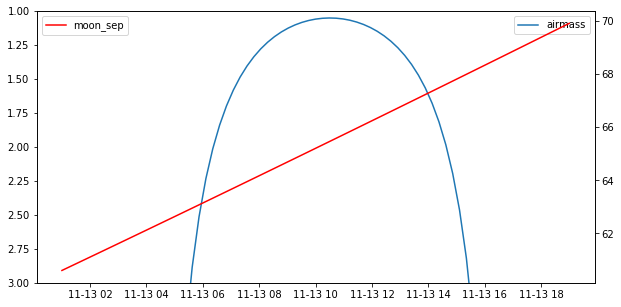

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dt_datetime, masked_airmass, label='airmass')
ax.invert_yaxis()
ax.set_ylim([3,1])
ax2 = ax.twinx()
ax2.plot(dt_datetime, sep, color='red', label='moon_sep')
ax.legend()
ax2.legend()

### Check airmass is correct by comparing to astroplan

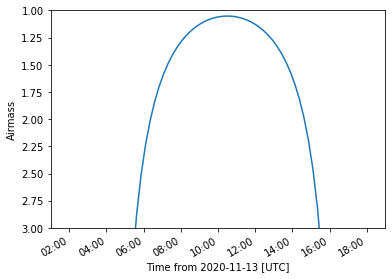

In [8]:
plot_airmass(hydraA, ctio, dt_datetime)

### Notes from Jielai

In [ ]:
# Notes from Jielai

# I did not check your calculatin of moon separation above to see if the numbers are right.

# The shorter your notebook, the easier it is to make things work
# To make it shorter, remove all un-necessary lines
# Cells in a notebook should be in order of what is needed first
# Every few hours, save, close and restart+rerun (or even every 20 min if you are re-running cells up and down)
# Once something works, remove all unnessary lines, close everything, restart jupyter notebook and re-run 
# Repeat above until you can run from first to last cell in order and get what you need. 